In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal
import corner

# 10a: Data processing and manipulation techniques 4

You now know basic python and how to manipulate arrays. You can write code which will preform manthematical operations on arrays and manipulate their sizes and shapes. 

You also now know how to find signals in data and you understand that real data and measurements are noisy. 

What we know need to understand now is when we have found a signal in data - how do we know that we have detected a signal?

In the next three lectures we'll cover an introduction to montecarlo methods and we'll the application of that to significance and error analysis.

Along the way we'll try to exercise some of the techniques you have learned this term and that are important for your CW such as converting math to code, statistics and making sure your code is free of bugs.

Let's start by thinking about what montecarlo methods are. We have seen them once before on this course when we estimated the value of $\pi$. (Look this up on moodle or ask if you don't remember!)

# Experiment 1: calculate g

Imagine you are in a lab. You are measuring g by rolling a ball down a 1m slope.

You will use:

$$\frac{m v^{2}}{2} = m g h $$


What two things do you need to measure?

answer: 

How might you find the uncertainty on each of these measurements?

answer: 

Below we have written two functions to help you measure the velocity of the ball and height. Running these functions would give you a 'measured' velocity and a 'measured 'height' to calculate g in your experiment.

In [4]:
def measure_velocity():
    k=np.sqrt(2.*1.0*24.5)+np.random.normal(loc=0.0, scale=0.1, size=None)
    return k

In [5]:
def measure_height():
    i=1.0+np.random.normal(loc=0.0, scale=0.001, size=None)
    return i

#### Exercise: 

Write a code which repeats this experiment, measuring the velocity and height 1000 times and plot a histogram of your results.

What value of v and h would you replort and therefore what is g and it's uncertainty?  What planet are you performing this experiment on?

This process of repeating a measurement is the real world equivalent of an monte carlo method. Monte Carlo is simply a method of explore the behvior of a system by repeated random sampling of variables. 

The Universe and our technology (e.g. how well our ruler measures) has provided the distribution and us repeating the measurement is the random sampling. In the next examples we will explore the uses of monte carlo methods in more detail and how we can use them to chareterise the significance of a measurment. 

# Experiment 2: Beat the casino!

Let's play a game. We will role a dice - if the value of 1 comes up you win, if 2, 3, 4, 5 or 6 turn up the house wins. Would you play and for how long?

Let's make a montecarlo sequence that simulates the game and see how much money you have left after N turns at the game. 

To begin assume:
1. number of games played = 5
2. You start with £1,000 each
3. Each time you play you must bet $80

Fill out this information below:

In [6]:
number_of_games_played=
amount_bet_per_game=
total_funds=

SyntaxError: invalid syntax (<ipython-input-6-ac8bfcfc14df>, line 1)

Now we need to make a function which rolls the dice. This function will have no inputs but will return "True" if you win and "False" if you loose (look above to see your win conditions).

Fill out the function below generating an appropriate random number for each roll of the dice:

In [75]:
def roll():
    '''This is a function which rolls the dice'''
    


Now lets make a function which plays the game. This function is written below but with 5 bugs - find and correct them. 

In [1]:
def play(total_funds, wager_amount, total_plays):
    '''This is a function which plays the game'''
    
    Play_num = []
    Funds = 
    play = 1

    while play < total_plays:
        if roll():
            total_funds = total_funds + wager_amount
            Play_num.append(player)
            Funds.append(total_funds)
        else
            total_funds = total_funds - wager_amount 
            Play_num.append(play)
            Funds.append.(total_funds)
            
        play =+ 1
        
    plt.plot(Play_num,Funds)
    Final_funds.append(Funds[-1])
    return(Final_funds)

SyntaxError: invalid syntax (<ipython-input-1-6b2d1c756c3f>, line 5)

Play the game above and take a look at the plot results via a histogram of your total funds at the end (label your axes appropriately). How many bets until, on average, you loose all your money? Note: your function play() will play one realisation of the game - in an MC simulation we are simulating many realisations to find a good approximation to the full disitribution of results. Try running 1000 realisations.

In [2]:
#plt.hist(...,density=True)
#plt.ylabel()
#plt.xlabel()

# Experiment 3: Parameter uncertainty with MC

Now let's try determining some uncertainties on parameters using MCs.

Why can we use MC to determine uncertainty? MC offers a way of sampling from a distribution. Imagine we have a distribution of values, our best fit (the value which comes up most often) but also a full range of other pretty decent values which could describe our data. We therefore have a $\textit{distribution}$ of values which can describe our data. We can get an empirical sample of those by sampling from that distribution.

In order to examine how to do a paremter uncertainty estimate using MC we need to generate some data and fit it with a model. We will then be asking what is the uncertainty on our model parameters?

## First let's make some model data to fit

Let's just make data from a straight line $\textit{but}$ we are going to make it such that there is some $\textit{intrinsic scatter}$ such that the uncertainties that are reported do not reflect the true variation in the data. Essentially there i additional variance in the data.

We will use this notation:

$y = m x + b$

$y_{err}$ = errors on y but these are underestimated by some amount

$f$ = some frational amount that the errors are underestimate by

Text(0, 0.5, 'y')

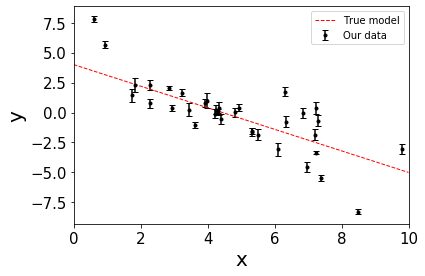

In [80]:
# Setting a seed - what does this do?
np.random.seed(123)

# The "true" parameters.
m_true = -0.9
b_true = 4.0
f_true = 0.9 

# Generate some synthetic data from the model.
N = 35 # number of data points to generate
x = np.sort(10 * np.random.rand(N)) # randomly generate x
yerr = 0.1 + 0.5 * np.random.rand(N) # randomy generate yerr
y = m_true * x + b_true # y = m*x + b
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

# plotting this data
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=3,label='Our data')

# plotting the model we drew the mock data from
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "r--", alpha=1.0, lw=1, label='True model')

# Always remember to apropriately label your plots!
plt.legend()
plt.xlim(0, 10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)

Above we see our data and model that allowed us to generate our mock data.

$\textbf{Note: Always remember to label all your plots correctly (readable x and y labels, readable tick marks, labels if needed)}$

Let's fit our data with a model. Let's assume this is a good model and use MC to find the uncertainty on the parameters.
 $$y = mx+b$$

Write a function model() for our model above:

As you have done before we will use scipy.optimize.curvefit to do this. 

Import the relevant command here:

Fit the data using curve_fit:

Plot
1. Our data
2. The True model
3. The Best fit model from curvefit
Make sure the plot is correctly labeled and readable

Great! So the best fit model looks pretty good $\textit{but}$ what $\textit{range}$ of parameters would be a good fit to this data?

We will assess this by simulating the dataset many times (a montecarlo method):
    1. Generate a large number of datasets - nTrials=5000
    2. Refit these to find the range of parameters that fit our data
    
You should end up with an array of the fit oarameters which has the dimensions (nTrials, 2) as you have 2 parameters in your model (m and b).

In [85]:
nTrials = 

In [86]:
aFitPars = np.array([]) # array of fit parameters
initial_guess = [-1.0,3.0]
for iTrial in range(nTrials):
    
    # Generate the data
    # Fit the model
    # Store the parameters
    
    
        

Make sure the shape of aFitPars is (nTrials,2)

What are the median and std dievation of the parameters that you have fit?

Plot a histogram of each parameter, as two subplots inside a plot hint use plt.subplot(), and draw a line at the $16^{th}$, $50^{th}$ and $84^{th}$ percentile. What is special about these values?

What would you report as the best fit parameter value and it's 1 $\sigma$ uncertainties?

Now the histograms of the distibution of parameters which fit the data well both look pretty gaussian except for some long tails in their 1D distributions. How do they vary with each other? Do the parameters depend on each other?

Plot these m's against these b's and see if they have any correlation with each other - that is, if they $\textit{co-vary}$

There is definitely some correlation in the parameter values. A high value of a corresponds to a lower value of b. We sometimes show these two plots (the histogram and scatter plot) as a $\textit{corner plot}$. An example is provided with the code below.

Read up on the help for this corner plot - what does the 'levels' command do?

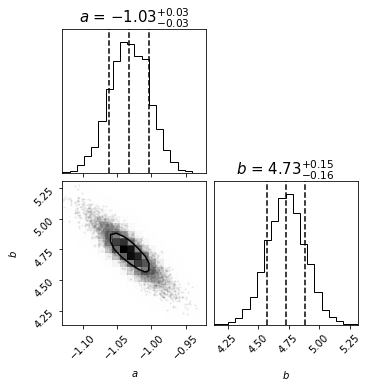

In [94]:
fig=corner.corner(aFitPars, labels=[r"$a$", r"$b$"], quantiles=[0.16, 0.5, 0.84], levels=(1-np.exp(-0.5),), show_titles=True, title_kwargs={"fontsize": 15}, smooth=True)

So monte carlo methods are basically just a means of simulating the distribution of parameters in order to gain an empirical understanding of the properties of that distribution such as understanding the summary statistics like the 'most common' value (the median), or the 'expectation' (the mean) or the spread of the data (the variance which is equal to the std dievation squared).

Let's think about this in another way:

The expectation of f(x )can be written
$$E[x]=\int x f(x) dx$$
This sort of integrale can be difficult to solve analyticaly. But if we can draw samples of $x$ then we have:
$$E[x]\approx \frac{1}{N} \sum f(x)$$
Which is a lot easier especially with a computer! The more samples we draw the closer we get to the real result.